In [ ]:
eps = np.arange(0.1,3.1,0.1)
min_samples = np.arange(5,26)
silhouette3 = np.zeros((len(eps)*len(min_samples)))
best_db_params = {}
i =0

for e  in eps:
    for ms in min_samples:

        db = DBSCAN(eps=e, min_samples=ms).fit(Multi_blob_Data)

        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        
        if labels.var() != 0:
            
            plt.figure()
            display_cluster(Multi_blob_Data,km = db, num_clusters= n_clusters_)                
            current_silhouette = silhouette_score(Multi_blob_Data, db.labels_)

            if current_silhouette > silhouette3.max():

                best_db_params = db.get_params()

            silhouette3[i] = current_silhouette

        i+=1
        
        plt.title('n_clusters = '+ str(n_clusters_)+', eps = ' + str(e) + ', min_samples = '+ str(ms)+ 
                  ', silhouette = '  + str(round(current_silhouette,3)))

In [ ]:
plt.figure()
plt.plot([i for i in range(0,len(eps)*len(min_samples))], silhouette3)
plt.xlabel('trials')
plt.ylabel('silhouette_score')

In [ ]:
best_silhouette3 = silhouette3.max()
best_silhouette3, best_db_params

In [5]:
! pip install scikit-image

C:\Users\Hoba\AppData\Local\Temp/ipykernel_20492/2125364319.py:34: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect", **rescale_params)


Compute structured hierarchical clustering...
(61, 77) (4697,) (61, 77)
Elapsed time:  0.19300341606140137
Number of pixels:  4697
Number of clusters:  27


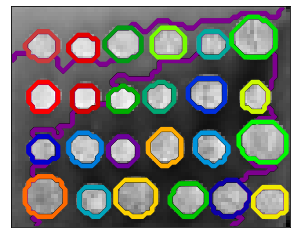

In [9]:
# Author : Vincent Michel, 2010
#          Alexandre Gramfort, 2011
# License: BSD 3 clause

import time as time

import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.fixes import parse_version

# these were introduced in skimage-0.14
if parse_version(skimage.__version__) >= parse_version("0.14"):
    rescale_params = {"anti_aliasing": False, "multichannel": False}
else:
    rescale_params = {}

# #############################################################################
# Generate data
orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect", **rescale_params)

X = np.reshape(rescaled_coins, (-1, 1))

# #############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*rescaled_coins.shape)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward", connectivity=connectivity
)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)
print(label.shape,  ward.labels_.shape, rescaled_coins.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

# #############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(
        label == l,
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
plt.xticks(())
plt.yticks(())
plt.show()

In [11]:
X.shape, label.shape

((4697, 1), (61, 77))

(9, 9)

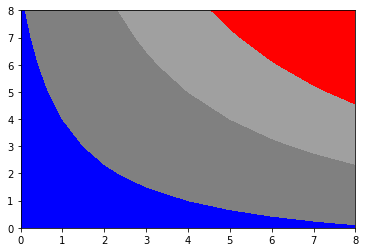

In [14]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()


In [19]:
from numpy.random import uniform, seed
from scipy.interpolate import griddata

In [22]:
def gauss(x,y,Sigma,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(Sigma)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))

def plot_countour(x,y,z):
    # define grid.
    xi = np.linspace(-2.1,2.1,100)
    yi = np.linspace(-2.1,2.1,100)
    ## grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,6,linewidths=0.5,colors='k')
    #CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    CS = plt.contourf(xi,yi,zi,6,cmap=cm.Greys_r)
    #plt.colorbar() # draw colorbar
    # plot data points.
    #plt.scatter(x,y,marker='o',c='b',s=5)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.title('griddata test (%d points)' % npts)
    plt.show()

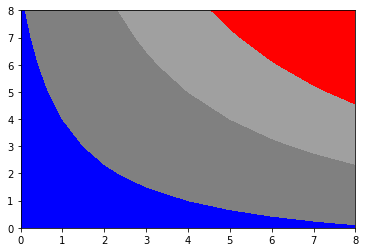

In [35]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h , levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

In [36]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
y

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [38]:
h

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])